<a href="https://colab.research.google.com/github/Yospy/Handwriting-Recognition-/blob/main/Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from numpy import *
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

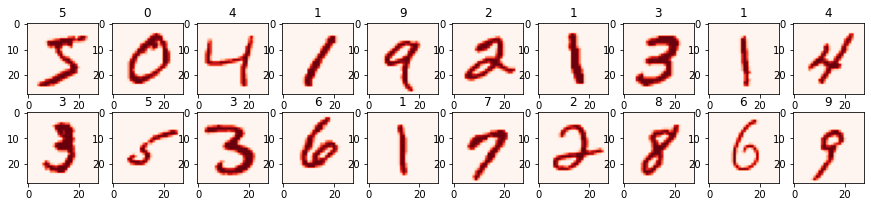

In [4]:
fig = plt.figure(figsize=(15,3))
for i in range(20):
  ax = fig.add_subplot(2,10,i+1)
  ax.imshow(squeeze(X_train[i]),cmap='Reds')
  ax.set_title(y_train[i])

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128,activation='sigmoid'),
                             tf.keras.layers.Dense(10,activation='sigmoid')

])

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - acc: 0.9997
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0038 - acc: 0.9997
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0030 - acc: 0.9999
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0025 - acc: 0.9998
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0024 - acc: 0.9998
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0019 - acc: 0.9999
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0016 - acc: 0.9999
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0013 - acc: 0.9999
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 8.7262e-04 - acc: 1.0000
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 8.6059e-04 - acc: 1.0000
Epoch 11/20
1875/1875

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0775 - acc: 0.9789


[0.07747987657785416, 0.9789000153541565]

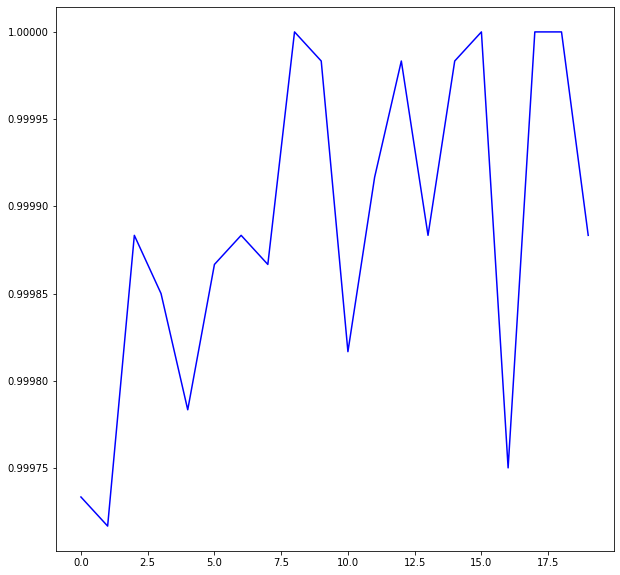

In [29]:
plt.figure(figsize=(10,10))
acc = history.history['acc']
plt.plot(acc,color='b')

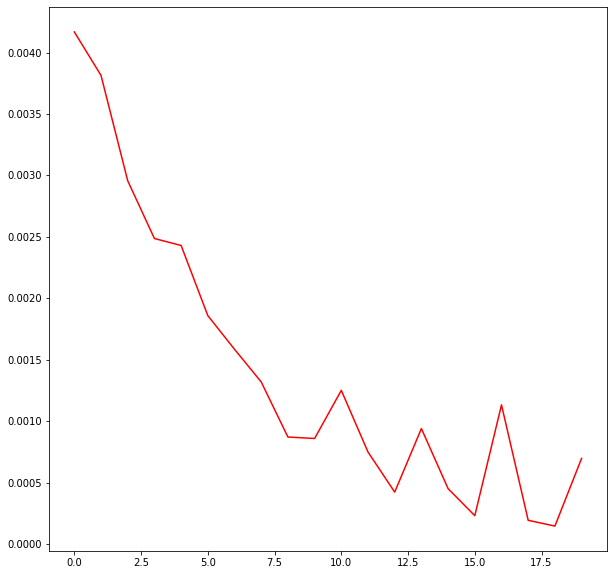

In [30]:
plt.figure(figsize=(10,10))
acc = history.history['loss']
plt.plot(acc,color='r')

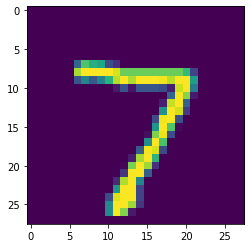

In [31]:
plt.imshow(X_test[0])

In [35]:
pred = model.predict(X_test)
print("Predicted:",argmax(pred[0]))

Predicted: 7


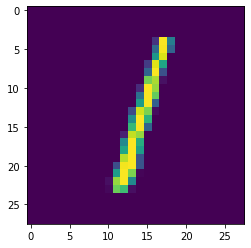

In [36]:
plt.imshow(X_test[2])

In [37]:
pred = model.predict(X_test)
print("Predicted:",argmax(pred[2]))

Predicted: 1
